# __Frozen Lake Problem Using Q Learning__ #

## **1. Importing Required Libraries**

In [147]:
import numpy as np                 # For matrix operations, initializing the Q-table
import matplotlib.pyplot as plt    # For visualizing the grid and the learned path
import random                      # To generate random holes and explore different actions

## **2. Defining Environment Parameters**

In [148]:
GRID_SIZE = 4      # 4x4 Grid
ALPHA = 0.1        # Learning rate (how much new information overrides old knowledge)
GAMMA = 0.9        # Discount factor (how much future rewards are considered)
EPSILON = 0.1      # Exploration rate (probability of taking a random action)
EPISODES = 500     # Number of training iterations

## **3. Initializing the Q-Table**

In [149]:
q_table = np.zeros((GRID_SIZE, GRID_SIZE, 4))  # 4 actions (up, down, left, right)

# A Q-table is initialized with zeros. It stores the expected reward for each state and action.

## **4. Defining Actions**

In [150]:
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]   # Actions: [up, down, left, right]

## **5. Creating the Grid (Rewards & Obstacles)**

In [151]:
goal = (3, 3)    # Goal position
start = (0, 0)   # Start position

**Generating Random Holes**

In [152]:
num_holes = 3
holes = set()
while len(holes) < num_holes:
    hole = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
    if hole != start and hole != goal:
        holes.add(hole)
holes = list(holes)

**Setting Rewards**

In [153]:
reward_grid = np.full((GRID_SIZE, GRID_SIZE), -1)      # Default reward is -1
reward_grid[goal] = 100                                # Goal reward is 100
for hole in holes:
    reward_grid[hole] = -100                           # Falling into hole penalty is -100

## **6. Function to Check Valid Moves**

In [154]:
def is_valid_state(x, y):
    return 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE and (x, y) not in holes    # Ensures moves stay within grid bounds and avoid holes.

## **7. Choosing an Action (Exploration vs Exploitation)**

In [155]:
def choose_action(state):
    if random.uniform(0, 1) < EPSILON:    # Exploration (EPSILON = 0.1 → 10% of the time, chooses a random action)
        return random.randint(0, 3)
    else:
        x, y = state                      # Exploitation (90% of the time, selects the best action from the Q-table)
        return np.argmax(q_table[x, y])

## **8. Training the Agent (Q-Learning Algorithm)**

In [156]:
for episode in range(EPISODES):              # Loop through each episode (500)
    state = start                            # Initialize agent at the start position (0,0)
    while state != goal:
        x, y = state
        action = choose_action(state)        # Select an action
        dx, dy = actions[action]
        next_state = (x + dx, y + dy)        # Move to the next state based on the action

        if not is_valid_state(*next_state):  # Check if the new state is valid
            next_state = state               # Stay in place if invalid

        reward = reward_grid[next_state]     # Update the Q-value using the Q-learning formula
        next_x, next_y = next_state
        q_table[x, y, action] += ALPHA * (reward + GAMMA * np.max(q_table[next_x, next_y]) - q_table[x, y, action])     # Q-learning Formula

        state = next_state

# Repeating until reaching the goal

## **9. Displaying the Q-Table**

In [157]:
print("Q-Table after Training:")
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        print(f"State ({i}, {j}): {q_table[i, j]}")     # Prints learned Q-values for each state
    print()

Q-Table after Training:
State (0, 0): [32.39159968 54.9539     36.64022159 33.54806838]
State (0, 1): [24.97277774  9.7700751  37.59706531 62.171     ]
State (0, 2): [-0.74726659 27.48339478  0.02869466 -0.62385947]
State (0, 3): [ 1.33657811 -0.48792052 -0.3940399  54.3444554 ]

State (1, 0): [ 3.69084049 59.71695923  3.8146901   3.69084049]
State (1, 1): [36.33910926 38.52008686 30.73864783 70.19      ]
State (1, 2): [0. 0. 0. 0.]
State (1, 3): [ 4.71567815  5.75260372 -0.23384893 83.97143629]

State (2, 0): [0. 0. 0. 0.]
State (2, 1): [42.75956964 79.1        54.91427745 27.85782048]
State (2, 2): [49.69812473 89.         58.94386326 45.8060994 ]
State (2, 3): [ 48.41586278  57.93273191  30.4278227  100.        ]

State (3, 0): [0. 0. 0. 0.]
State (3, 1): [0. 0. 0. 0.]
State (3, 2): [-0.1       83.3228183  0.         4.117031 ]
State (3, 3): [0. 0. 0. 0.]



## **10. Extracting the Shortest Path**

In [158]:
path = []                          # Extracts the best path from the learned Q-table
state = start
visited = set()
while state != goal:
    if state in visited:
        break
    visited.add(state)
    x, y = state
    action = np.argmax(q_table[x, y])
    dx, dy = actions[action]
    next_state = (x + dx, y + dy)
    if next_state == state or not is_valid_state(*next_state):
        break
    path.append(next_state)
    state = next_state

## **11. Visualizing the Grid**

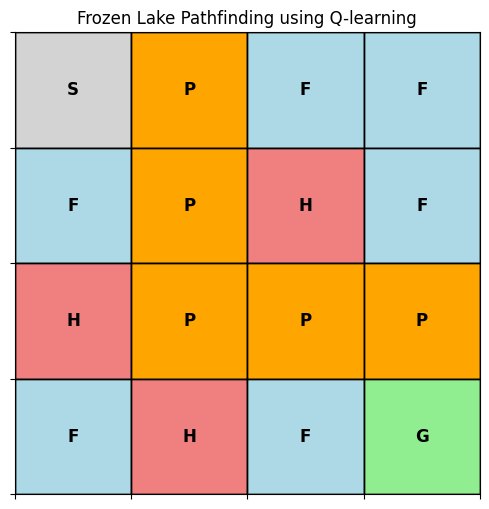

In [159]:
fig, ax = plt.subplots(figsize=(6, 6))             # Creates a grid representation using matplotlib
ax.set_xticks(range(GRID_SIZE + 1))
ax.set_yticks(range(GRID_SIZE + 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, which="major", color="black", linestyle="-", linewidth=1)
ax.invert_yaxis()

# Color Mapping
colors = {
    "S": "lightgrey",   # Start
    "G": "lightgreen",  # Goal
    "H": "lightcoral",  # Hole
    "P": "orange",      # Path
    "F": "lightblue"    # Remaining Blocks
}

# Drawing the Grid with Labels
for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):

        if (i, j) == start:                # Labels for Gridblocks
            label = "S"
        elif (i, j) == goal:
            label = "G"
        elif (i, j) in holes:
            label = "H"
        elif (i, j) in path:
            label = "P"
        else:
            label = "F"

        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=colors[label], ec="black"))
        ax.text(j + 0.5, i + 0.5, label, ha='center', va='center', fontsize=12, fontweight='bold', color='black')

plt.title("Frozen Lake Pathfinding using Q-learning")
plt.show()